In [24]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
# df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",header = 1,encoding = "ISO-8859-1")


In [3]:
# df = pd.read_csv("https://raw.githubusercontent.com/robertofranceschi/default-credit-card-prediction/master/dataset/default%20of%20credit%20card%20clients.csv")
df = pd.read_csv("D:/Projects/SVM/default_of_credit_card_clients.csv")

In [4]:
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [5]:
df.rename({'default.payment.next.month':'default'},axis = 'columns',inplace = True)
df.rename({'PAY_0':'PAY_1'},axis = 'columns',inplace = True)

In [6]:
df.drop('ID',axis = 1,inplace= True)

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
default        int64
dtype: object

In [9]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [10]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [11]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

Here we can see that there are other values of education and marriage which are in allowed categories.
First lets check if the total count of these new categories is not a lot and then drop them

In [12]:
len(df.loc[(df.EDUCATION==0)|(df.MARRIAGE==0)])

68

In [13]:
df_clean = df.loc[(df.EDUCATION!=0)&(df.MARRIAGE!=0)]

In [14]:
len(df_clean)

29932

In [15]:
df_no_default = df_clean[df_clean['default']==0]
df_default = df_clean[df_clean['default']==1]

In [16]:
df_no_default_downsampled = resample(df_no_default,replace = False,n_samples = 1000, random_state = 42)
len(df_no_default_downsampled)

1000

In [17]:
df_default_downsampled = resample(df_default,replace = False,n_samples = 1000, random_state = 42)
len(df_no_default_downsampled)

1000

In [18]:
df_downsampled = pd.concat([df_no_default_downsampled,df_default_downsampled])

In [19]:
X = df_downsampled.drop('default',axis = 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000.0,2,3,1,28,0,0,0,0,-2,...,50000.0,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,410.0,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0


In [20]:
y = df_downsampled['default'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: default, dtype: int64

In [22]:
X_ohe = pd.get_dummies(X,columns=["SEX","EDUCATION","MARRIAGE","PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y,random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [26]:
svm = SVC(random_state= 42)
svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [36]:
pred = svm.predict(X_test_scaled)

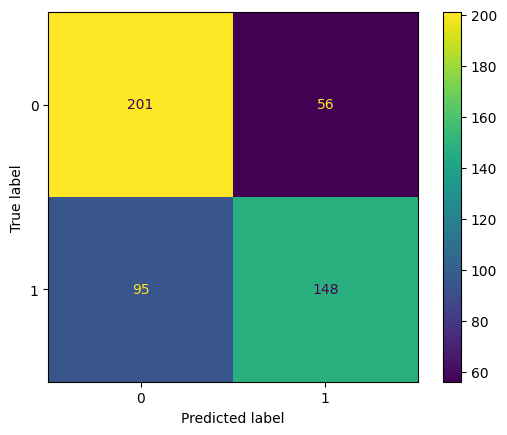

In [37]:
cm = confusion_matrix(y_test,pred,labels=svm.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=svm.classes_)
disp.plot()

In [40]:
param_grid = [{'C':[0.5,1,10,100],'gamma':['scale',1,0.1,0.01,0.001,0.0001],'kernel' : ['rbf','poly','linear']}]
optimal_params = GridSearchCV(SVC(),param_grid,cv=5)
optimal_params.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'poly', 'linear']}])

In [41]:
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


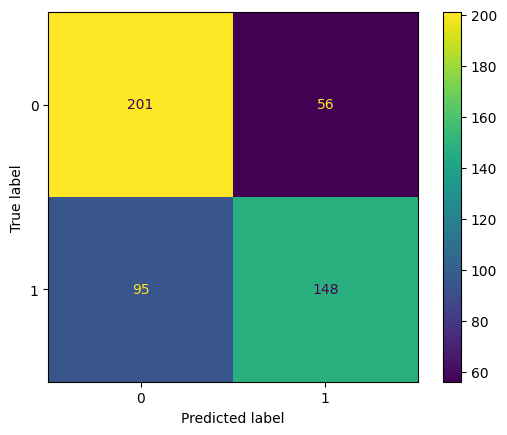

In [43]:
best_svm = SVC(random_state = 42,C= 100,gamma = 0.001,kernel = 'rbf')
best_svm.fit(X_train_scaled,y_train)
pred_new = svm.predict(X_test_scaled)
cm = confusion_matrix(y_test,pred_new,labels=svm.classes_)
disp1 = ConfusionMatrixDisplay(cm,display_labels=svm.classes_)
disp1.plot()